In [71]:
%pylab inline

import pandas as pd
import numpy as np

# Seaborn requires matplotlib package to be installed
# https://stanford.edu/~mwaskom/software/seaborn/installing.html
#
# If it is not available, use:
# pip install matplotlib
# 
# If you are using Anaconda distribution, then
# conda install matplotlib
import seaborn as sb
import json
import datetime

Populating the interactive namespace from numpy and matplotlib


In [72]:
# Read and inspect the data file
df = pd.read_csv("product_test_data.csv")
print df.head(10)
print df.columns
print df.dtypes

   Row_ID  User_ID   Product  \
0       1       32  Product1   
1       2       32  Product2   
2       3       32  Product3   
3       4       32  Product4   
4       5       32  Product5   
5       6       49  Product1   
6       7       49  Product2   
7       8       49  Product3   
8       9       49  Product4   
9      10       49  Product5   

                                              Amount  Entry_Date  
0  [149, 830, 441, 863, 850, 804, 232, 891, 321, ...  2015-12-29  
1  [15, 259, 264, 365, 972, 254, 78, 767, 553, 85...  2015-12-29  
2  [898, 475, 346, 235, 227, 230, 316, 418, 723, ...  2015-12-29  
3  [384, 847, 692, 796, 350, 1, 499, 858, 333, 94...  2015-12-29  
4  [347, 665, 964, 188, 399, 380, 621, 477, 74, 1...  2015-12-29  
5  [543, 185, 743, 955, 214, 896, 387, 257, 640, ...  2015-12-29  
6  [479, 599, 95, 869, 54, 823, 359, 245, 67, 831...  2015-12-29  
7  [711, 906, 928, 77, 668, 818, 8, 983, 161, 289...  2015-12-29  
8  [866, 754, 777, 834, 578, 323, 285, 437, 

## Data Transformations

In [73]:
# Convert the string which has a list of values to an actual python list
df["Amount"] = df["Amount"].apply(json.loads)

# Create a new column which has the sum of production application
df["Total_Amount"] = df["Amount"].apply(sum)

# Create a new column for the number of entries
df["No_of_entries"] = df["Amount"].apply(len)

# Remove unused columns
df.drop(["Amount"], axis=1, inplace=True)

# Check if the transformations have been successful
print df.head(10)
print df.columns

   Row_ID  User_ID   Product  Entry_Date  Total_Amount  No_of_entries
0       1       32  Product1  2015-12-29        301651            599
1       2       32  Product2  2015-12-29        472310            951
2       3       32  Product3  2015-12-29         29540             59
3       4       32  Product4  2015-12-29        294157            574
4       5       32  Product5  2015-12-29        507424            990
5       6       49  Product1  2015-12-29        440261            858
6       7       49  Product2  2015-12-29        259892            513
7       8       49  Product3  2015-12-29          8527             16
8       9       49  Product4  2015-12-29        202962            412
9      10       49  Product5  2015-12-29        289457            554
Index([u'Row_ID', u'User_ID', u'Product', u'Entry_Date', u'Total_Amount',
       u'No_of_entries'],
      dtype='object')


# 1) List the top 10 customers who had the maximum usage of all products

In [74]:
# Perform a Group-By operation on "User_ID" and sum up the "Total_Amount" field
top10_users_products = df.groupby(['User_ID'], as_index=False)['Total_Amount'].sum()

# Sort in descending order based on "Total_Amount" field
top10_users_products.sort_values("Total_Amount", ascending=False, inplace=True)

# By default, pandas retains the index values as in the original dataframe.
# Reset the index to start from beginning
top10_users_products.reset_index(inplace=True)

# Show only the top 10 records
print top10_users_products.head(10)

   index  User_ID  Total_Amount
0     12       12      71658457
1     14       14      65294006
2     49       49      63823203
3     29       29      62586179
4     36       36      61682301
5     41       41      61397703
6     30       30      61292633
7     16       16      61094152
8      5        5      60841238
9     11       11      60616799


## 2) List the top 3 users who has the most number of data entries for "Product1"

In [75]:
# Filter rows for "Product1"
top3_product1 = df[df["Product"] == "Product1"]

# Extract the columns - "User_ID" and "No_of_entries"
top3_product1 = top3_product1[["User_ID", "No_of_entries"]]

# Sort on "No_of_entries" column in descending order
top3_product1.sort_values("No_of_entries", ascending=False, inplace=True)

# Display top 3 rows
print top3_product1.head(3)

       User_ID  No_of_entries
10185       43           1000
9855         5            998
3095        14            998


## 3) Which product has the maximum usage across all customers?

In [76]:
product_max_usage = df.groupby(["Product"], as_index=False)["Total_Amount"].sum()
print product_max_usage.max(column="Total_Amount")

Product            Product5
Total_Amount    5.58105e+08
dtype: object


## 4) Find the weekly usage of each product across all users

In [77]:
# Survey duration is given as 90 days
SURVEY_DURATION = 90

# Take the current time
today_date = datetime.datetime.today()

# Calculate the start date as 90 days prior
start_date = today_date - datetime.timedelta(days=SURVEY_DURATION)

# Convert the date that is a string to YY-MM-DD format and
# find the number of days elapsed from the start date
df["Days"] = (df["Entry_Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d")) - start_date) / np.timedelta64(1, "D")

# Round off the day values to a whole number
df["Days"] = df["Days"].round(0)

# Calculate the week by dividing the number of days by 7.
# Add 1 to start the week count from 1 instead of 0
df["Week"] = ((df["Days"] / 7) + 1).round()

# Remove the "Days" column
df.drop(["Days"], axis=1, inplace=True)


# Group by "Product" and "Week" fields followed by summation over "Total_Amount" field
weekly_usage_all_products = df.groupby(["Product", "Week"], as_index=False)["Total_Amount"].sum()

# Sort by "Week" and then "Product"
weekly_usage_all_products.sort_values(["Week", "Product"], inplace=True)

print weekly_usage_all_products

     Product  Week  Total_Amount
0   Product1     1      28317175
14  Product2     1      31352269
28  Product3     1      25861477
42  Product4     1      29108386
56  Product5     1      30708937
1   Product1     2      35294506
15  Product2     2      34503744
29  Product3     2      35996603
43  Product4     2      39420560
57  Product5     2      38736725
2   Product1     3      44675352
16  Product2     3      42741370
30  Product3     3      44776651
44  Product4     3      40735130
58  Product5     3      41976218
3   Product1     4      27321105
17  Product2     4      24911192
31  Product3     4      27531769
45  Product4     4      26312989
59  Product5     4      24572855
4   Product1     5      41320269
18  Product2     5      42365552
32  Product3     5      44853512
46  Product4     5      42839699
60  Product5     5      42637323
5   Product1     6      48098657
19  Product2     6      42317855
33  Product3     6      44735495
47  Product4     6      45644232
61  Produc

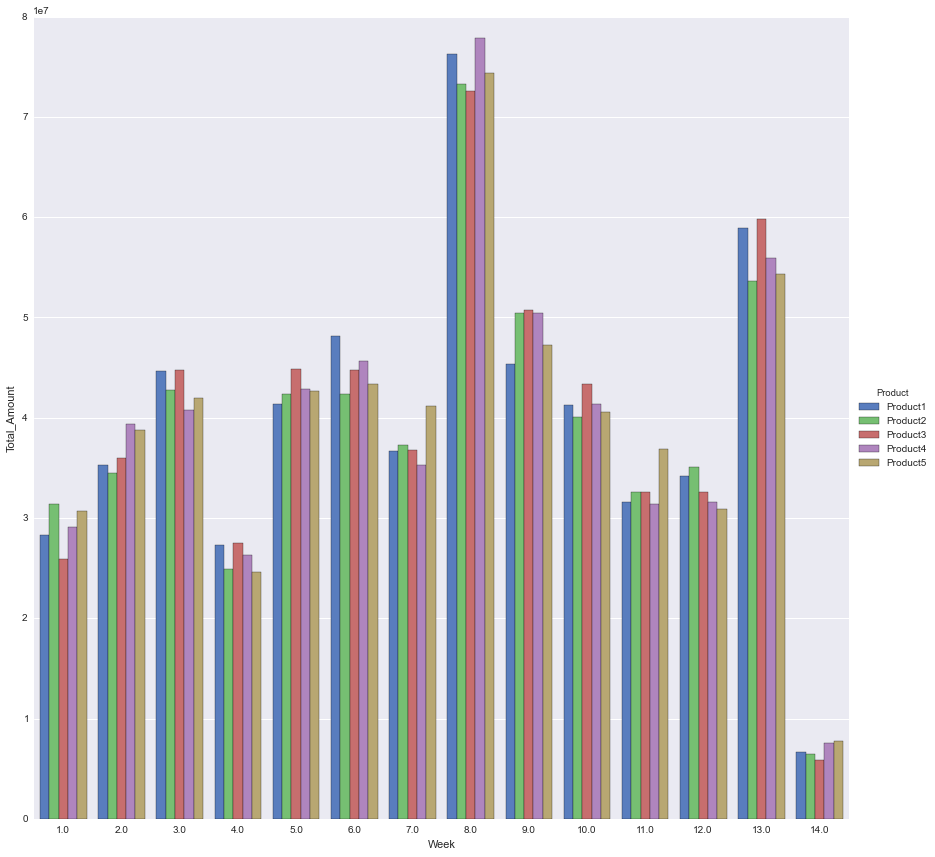

In [78]:
# Plotting the above data using seaborn package
print sb.factorplot(
    x="Week", y="Total_Amount",
    hue="Product",
    data=weekly_usage_all_products,
    size=12,
    kind="bar",
    palette="muted"
)